duckdb: This is a library used for working with the DuckDB database system, which is an in-process SQL OLAP (Online Analytical Processing) database management system. It allows you to execute SQL queries directly on Pandas DataFrames or other data sources.

pandas (pd): A powerful library in Python for data manipulation and analysis, particularly for working with tabular data (data in DataFrames).

matplotlib.pyplot (plt): A plotting library used for creating static, animated, and interactive visualizations in Python.

In [2]:
import duckdb
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

Exploratory Data Analysis

When trying to understand our data, it helps immensely to start by looking at individual records in the data, along with any data dictionaries that are available. We are going to be looking at data about PPP loans (Paycheck Protection Program) that were part of the early COVID-19 relief efforts in 2020.

This data is downloadable here:
https://data.sba.gov/dataset/ppp-foia

glob: This library is used to find all the pathnames matching a specified pattern according to the rules used by the Unix shell. It’s not used in the provided code but may be useful for finding files in a directory.

os: This module provides a way of using operating system-dependent functionality like reading or writing to the file system, checking if a file exists, etc.

urllib.request: This module is used for opening and reading URLs, typically used for downloading files from the web.

We are downloading the files into the specified folder.

In [4]:
import glob
import os
import urllib.request 


URLs = ['https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/738e639c-1fbf-4e16-beb0-a223831011e8/download/public_150k_plus_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/a7fa66f4-fd2e-433c-8ef9-59780ef60ae5/download/public_up_to_150k_1_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/7d2308a8-0ac1-48a8-b21b-f9eb373ac417/download/public_up_to_150k_2_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/5158aae1-066d-4d01-a226-e44ecc9bdda7/download/public_up_to_150k_3_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/d888bab1-da5b-46f2-bed2-a052d48af246/download/public_up_to_150k_4_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/ee12d751-2bb4-4343-8330-32311ae4e7c7/download/public_up_to_150k_5_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/27b874d9-a059-4296-bb74-374294c48616/download/public_up_to_150k_6_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/434efae0-016a-48da-92dc-c6f113d827c1/download/public_up_to_150k_7_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/4fc8e993-c3b9-4eb2-b9bb-dfbde9b1fb6f/download/public_up_to_150k_8_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/7f9c6867-2b55-472e-a4f3-fd0f5f27f790/download/public_up_to_150k_9_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/a8f2c8b2-facb-4e97-ad5f-7c8736c8b4b6/download/public_up_to_150k_10_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/6f9787a3-afd6-45b2-b78e-ad0dc097c1c3/download/public_up_to_150k_11_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/b6528428-fbd9-4ca6-ae08-9e3416f8ee7f/download/public_up_to_150k_12_230930.csv'
       ]

filenames = [i.split('/')[-1] for i in URLs]
print(filenames)
path = "/Users/yashwanth/Documents/GWU/Sem 3/Data Mining/Class 1/Class Materials/Dataset/"

for filename, url in zip(filenames, URLs): 
    if os.path.isfile(path+filename):
        print(f'file already downloaded: {filename}')
    else:
        print(f'downloading file: {filename}')
        headers = urllib.request.urlretrieve(url, filename=path+filename)

['public_150k_plus_230930.csv', 'public_up_to_150k_1_230930.csv', 'public_up_to_150k_2_230930.csv', 'public_up_to_150k_3_230930.csv', 'public_up_to_150k_4_230930.csv', 'public_up_to_150k_5_230930.csv', 'public_up_to_150k_6_230930.csv', 'public_up_to_150k_7_230930.csv', 'public_up_to_150k_8_230930.csv', 'public_up_to_150k_9_230930.csv', 'public_up_to_150k_10_230930.csv', 'public_up_to_150k_11_230930.csv', 'public_up_to_150k_12_230930.csv']
file already downloaded: public_150k_plus_230930.csv
file already downloaded: public_up_to_150k_1_230930.csv
file already downloaded: public_up_to_150k_2_230930.csv
file already downloaded: public_up_to_150k_3_230930.csv
file already downloaded: public_up_to_150k_4_230930.csv
file already downloaded: public_up_to_150k_5_230930.csv
file already downloaded: public_up_to_150k_6_230930.csv
file already downloaded: public_up_to_150k_7_230930.csv
file already downloaded: public_up_to_150k_8_230930.csv
file already downloaded: public_up_to_150k_9_230930.csv


In [5]:
# Searching for all CSV files in the specified directory (path), sorts the filenames alphabetically, 
# and prints each one. This is useful for verifying the files present in your directory or for subsequent processing where you 
# might need the filenames in a specific order.

filenames = glob.glob(path + "/*.csv")
for i in sorted(filenames): 
    print(i)

/Users/yashwanth/Documents/GWU/Sem 3/Data Mining/Class 1/Class Materials/Dataset/public_150k_plus_230930.csv
/Users/yashwanth/Documents/GWU/Sem 3/Data Mining/Class 1/Class Materials/Dataset/public_up_to_150k_10_230930.csv
/Users/yashwanth/Documents/GWU/Sem 3/Data Mining/Class 1/Class Materials/Dataset/public_up_to_150k_11_230930.csv
/Users/yashwanth/Documents/GWU/Sem 3/Data Mining/Class 1/Class Materials/Dataset/public_up_to_150k_12_230930.csv
/Users/yashwanth/Documents/GWU/Sem 3/Data Mining/Class 1/Class Materials/Dataset/public_up_to_150k_1_230930.csv
/Users/yashwanth/Documents/GWU/Sem 3/Data Mining/Class 1/Class Materials/Dataset/public_up_to_150k_2_230930.csv
/Users/yashwanth/Documents/GWU/Sem 3/Data Mining/Class 1/Class Materials/Dataset/public_up_to_150k_3_230930.csv
/Users/yashwanth/Documents/GWU/Sem 3/Data Mining/Class 1/Class Materials/Dataset/public_up_to_150k_4_230930.csv
/Users/yashwanth/Documents/GWU/Sem 3/Data Mining/Class 1/Class Materials/Dataset/public_up_to_150k_5_230

Data Processing Tools

There are many ways we can read and process data. Within the Python ecosystem, pandas is a very common tool for working with data in flat files of tabular data, such as these comma-separated-values (CSV) files. It uses a dataframe style interface, which is conceptually similar to a table.

In a production environment, however, it is also common to work with other tools, including relational databases or data warehouses that use SQL is their primary language for analysis, or even "big data" tools, such as Spark, which allows for seamless switching between a dataframe interface and a traditional SQL interface.

A more recent tool that allows for very efficient analytical SQL queries over files is DuckDB. In many cases, DuckDB is faster than pandas for similar queries and it also allows for easy interop, converting result sets to pandas on the fly. It also is able to operate on files that are larger than system memory, which can be useful in many circumstances. The PPP data we are looking at is about 5GB on disk, but requires over 20GB of RAM to load as a pandas dataframe.

In [7]:
# Using the duckdb library to create a temporary SQL view that combines data from multiple CSV files

duckdb.sql(f'CREATE TEMPORARY VIEW ppp AS (SELECT * FROM "{path}public*.csv")')

In [8]:
# Now that the data is combined under name ppp, we will print the total number of entries

duckdb.sql('SELECT COUNT(*) FROM ppp').df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,count_star()
0,11468299


In [9]:
# Display the contents of data for first 10 entries

duckdb.sql(f'SELECT * FROM ppp LIMIT 10').df()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,2020-05-01,0464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,None,29150-9662,2020-12-18,Paid in Full,24,100,769358.78,769358.78,0,None,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,None,773553.37,2020-11-20
1,9777677704,2020-05-01,0464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,None,29420-9000,2021-09-28,Paid in Full,24,100,736927.79,736927.79,0,None,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,None,746336.24,2021-08-12
2,5791407702,2020-05-01,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,None,98112-2922,2021-03-17,Paid in Full,24,100,691355.00,691355.00,0,None,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,2021-02-10
3,6223567700,2020-05-01,0920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,None,92407-1740,2021-10-16,Paid in Full,24,100,499871.00,499871.00,0,None,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-23,21,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,None,395264.11,2021-09-10
4,9662437702,2020-05-01,0101,PPP,AERO BOX LLC,N/A,N/A,None,None,2021-08-17,Paid in Full,24,100,367437.00,367437.00,0,None,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,N/A,None,NA,N/A,None,25,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,None,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,None,370819.35,2021-04-08
5,9774337701,2020-05-01,0101,PPP,HUDSON EXTRUSIONS INC.,N/A,N/A,None,None,2021-11-17,Paid in Full,24,100,328840.00,328840.00,0,None,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,N/A,None,NA,N/A,None,22,326199.0,Unanswered,Unknown/NotStated,NaN,328840.00,NaN,NaN,NaN,NaN,NaN,None,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,None,332137.41,2021-05-10
6,9794577700,2020-05-01,0491,PPP,FRUIT COVE BAPTIST CHURCH OF JACKSONVILLE FL INC,501 State Road 13,Saint Johns,None,32259-2832,2021-02-19,Paid in Full,24,100,289765.00,289765.00,0,None,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Saint Johns,SA

In [10]:
# Describing the contents of ppp - To get information about the what kind of data exist in each column

duckdb.sql("DESCRIBE ppp").df()

,column_name,column_type,null,key,default,extra
0,LoanNumber,BIGINT,YES,None,None,None
1,DateApproved,DATE,YES,None,None,None
2,SBAOfficeCode,VARCHAR,YES,None,None,None
3,ProcessingMethod,VARCHAR,YES,None,None,None
4,BorrowerName,VARCHAR,YES,None,None,None
5,BorrowerAddress,VARCHAR,YES,None,None,None
6,BorrowerCity,VARCHAR,YES,None,None,None
7,BorrowerState,VARCHAR,YES,None,None,None
8,BorrowerZip,VARCHAR,YES,None,None,None
9,LoanStatusDate,DATE,YES,None,None,None


Data Types

Primitive Types
DuckDB's CSV reader's default behavior is to try to infer the data type for each column. In the context of a database or , you can think of the type it "sniffs" as being a primitive type, such as Int, Float, VARCHAR, etc.

While this behavior is certainly convenient, I will note that it can also be dangerous from a correctness point of view. For example, the very first column is LoanNumber, which DuckDB inferred is of type BIGINT. That is quite possibly the correct type, However, many "ID" of "X_Number" fields have leading zeros, in which case BIGINT is a poor choice of type, as that leading zero will get lost.

It may be that DuckDB is smart enough not to do that: it may have scanned the full set of files and determined that there are no leading zeros (we see that SBAOfficeCode, which does have values with leading zeros is typed as a VARCHAR. However, just because there are no leading zeros in the files/tables you are looking at for performing your analysis or building your model, it does not mean that those types of values will not exist when you take any code to production.

This highlights two recurring themes in this course:

Data processing and Data Mining tools often have functionality that is super convenient, but this convenience can often mask or cause data quality or modeling issues.
Always, Always look at your data!
Logical Types
Looking at the PPP loans, we have a number of different data types:

LoanNumber is an integer, but is a (presumably) unique key.
DateApproved is a date field
SBAOfficeCode, ProcessingMethod, others are categorical (or nominal) fields
BorrowerName is a string, which can be treated as text
BorrowerAddress, BorrowerCity, BorrowerState, BorrowerZip all constitute an Address, but the components, such as State or Zip could also be viewed as categorical variables
Term appears to be an ordinal integer, though it seems to only exist for certain values (multiples of 12 - so, presumably months)
InitialApprovalAmount, CurrentApprovalAmount are continuous (decimal) numbers (dollars)
And so on.

Understanding these kinds of types: Key, Dates, Categorical, String, Address, Ordinal, Decimals, and Floats (plus others!) are key to building an understanding of your data. They dictate so many things in teh analysis:

How you plot/visualize data
What measures/metrics should be used to describe them (e.g., you should not use "mean" for something like SBAOfficeCode, even if it is represented as an integer
How you will construct features using these in supervised or unsupervised models
Whether it is even appropriate to use them as features (unique keys typically should not be used)
Let's talk about each of these data types in more detail.

Nominal, or Categorical variables:
These variables have discrete values, such as "Hair Color", "Product Type" or ProcessingMethod
Can be any "data type", such as a string ("Blonde") or numerical type (132)
These values have no natural ordering
In some cases, there may be a heirarchy of values, such as Product Type = "Shoes: Sneakers"
A special case of these are binary or boolean attributes, such as "in-stock" or "is-active"
Let's take a look at SBAOfficeCode

In [12]:
# extracting the top 5 SBA offices with the highest number of loans from the combined data, allowing you to quickly see which offices handled the most loans.

duckdb.sql('SELECT SBAOfficeCode, COUNT(*) AS number_loans FROM ppp GROUP BY SBAOfficeCode ORDER BY number_loans DESC LIMIT 5').df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,SBAOfficeCode,number_loans
0,0455,726848
1,0507,620035
2,0405,553321
3,0914,473233
4,0202,470575


The data dictionary is not super helpful about what this field means. It states, "SBA Origination Office Code" As the field description.

One thing that you'll find is that, even when working with a single data set like this, you often need to find supplemental data. So far, I have not found a convenient data set that describes these office locations. There is, however, a lookup tool here: SBA Office Lookup Tool

From this tool, I found that the top few offices are:

SBAOfficeCode	Description
0455	SOUTH FLORIDA DISTRICT OFFICE
0507	ILLINOIS DISTRICT OFFICE
0405	GEORGIA DISTRICT OFFICE

Another highlight worth calling out is that the 2nd to least common code is "None", which means that we don't have a value. Missing values can be tricky to deal with. In particular, you need to determine whether they are "intentionally" missing or inadvertently missing. And, many modeling techniques do not handle null values, so some form of imputation or other cleanup may be necessary. At the moment, we will press on by looking at some other fields

In [14]:
# which industries received the most loans, providing insights into which sectors might have been most in need of financial support

duckdb.sql('SELECT NAICSCode, COUNT(*) AS number_loans FROM ppp GROUP BY NAICSCode ORDER BY number_loans DESC').df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,NAICSCode,number_loans
0,812112.0,458411
1,722511.0,326447
2,531210.0,251837
3,485310.0,250850
4,812990.0,231016
...,...,...
1264,331423.0,1
1265,517310.0,1
1266,422930.0,1
1267,334113.0,1


OK, two things.

First, this is a field that I'm familiar with. This is the 6-digit North American Industry Classification System code. We can find a mapping of the 6-digit codes to Industry names and descriptions, including in formats that we could download and join to this data to make it more understandable. I won't do that now, but you can try downloading that data and doing something like that yourself.

NACSC Link - https://www.census.gov/naics/


Second: this field hits on the topic I mentioned earlier: There appears to be something odd here, where the NAICSCode is being shown as a float or decimal field, despite being typed as a BIGINT, according to the schema.

In this case, I believe that the reason is the .df() call. I'm doing that for display purposes (since it is cleaner looking than the ASCII based .show() command. But, what it actually does is convert the results to a pandas dataframe and, it appears, the correct typing is getting lost along the way.

This is another good example of the need, when doing data analysis/data mining, to be overly cautious about little details like this!

Ordinal Fields

A special case of categorical variables are Ordinal Variables. These, as their name implies, haven an ordering associated with them.

The closest variable in the PPP data to being ordinal is BusinessAgeDescription. Let's look at the values:

In [17]:
# distribution of loans based on the age of the businesses

duckdb.sql('SELECT BusinessAgeDescription, COUNT(*) AS number_loans FROM ppp GROUP BY BusinessAgeDescription ORDER BY number_loans DESC').df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,BusinessAgeDescription,number_loans
0,Existing or more than 2 years old,10229955
1,New Business or 2 years or less,702002
2,Unanswered,530833
3,"Startup, Loan Funds will Open Business",3311
4,Change of Ownership,2197
5,None,1


Some of these seem to have a natural ordering of Age, from "Startup" to "New Business or 2 years or less" to "Existing or more than 2 years old". However, the "Unanswered" and "Change of Ownership" sort of break the view that the data is ordinal. At best, some of the values are ordinal, but not all.

A typical example of more ordinal values would be things like "Risk" with "low", "medium", and "high". This could even be done with numerical values, such as, "Severity = 2", but the numerical value is not meaningful, apart from it's ability to order values.

Another example is "rank" attributes. For example, the 2024 Olympics were just held. In any given sport, there is a "place": Place = 1,2,3,4,5,etc. And while you may colloquially say, "she finished 4 places ahead of me" - that difference (+4) is not super meaningful. Perhaps the difference between 1st and 5th place was much tighter than the difference between 10th and 14th.

Numerical fields:
We've seen some numerical fields that are actually categorical, such as NAICSCode.

But there are also "true" numerical fields, as well, whether integers, decimals, floating point, etc.

All numerical fields are also ordinal, since they fall on a number line.

Numerical fields divide into two types:

Interval-scaled:
Interval-scaled values are those with meaningful differences, but no zero point. In the PPP Loan data, there are no true examples of this. Money can be an example, for example, "Current Balance". Your accounts could have a positive, negative or zero balance. It would make sense to talk about differences in balances between account holders, but you would not take a ratio without qualifying it first with respect to the sign.

Temperature in Celcius or Fahrenheit is also interval-scaled: 30 degrees C is not 3x as hot as 10 degrees. But, they do have a difference of 20 degrees.

Ratio-scaled:
Ratio-scaled values have an inherent zero point, which means we can express the ratios between them as significant. In the PPP data, some examples are things like CurrentApprovalAmount or JobsReported. We can say that Business A has twice as many employees as Business B - a ratio or was approved for 3x the money.

Componentized fields: Dates, Addresses, Phone Numbers, etc.:
You'll very frequently run across fields (or combinations of fields) that have more complex values, such as dates, or addresses. While dates and datetimes are often understood natively by programming langagues or databases, none of the others typically are supported automatically by your tooling.

What all of these types of fields have in common, however, is that they have "components" within them, for example:

Date has day, month, year
Address has house number, street name, street direction, unit/suite/apt number, city, state, zipcode, country
Comparing 2 values of one of these fields can get complex:

Knowing that 2029 G St NW, Washington, DC 20052 (the address for this building) and 701 21st St NW, Washington, DC 20052, the Textile museum around the corner are very close to each other - is not straightforward!
Data Types: Summary
So, with that brief tour of data types, why does it matter?

Actually, it affects almost all decisions in the data mining process:

For visualizing or calculating descriptive statistics:

When you have categorical variables, you look at the frequency of values, such as the "most common" values or frequency distributions using a bar chart.
For numerical variables, you can calculate statistics, such as mean, min, max, variance and can plot histograms or cumulative distribution functions.
For things like addresess, you need more complex logic!
When you are doing feature engineering or unsupervised learning:

Categorical variables need special handling for most algorithms, such as through one-hot encoding
Knowing whether you should perform ratios or differences of numerical variables when combing them to create new features
How to handle null values
When you are building a supervised model:

If you're predicting a categorical or binary variable, you are doing classification
If you're predicting a numerical variable, you are doing regression
If you're predicting an ordinal variable, you are doing ordinal regression

Describing Data: Distributions and Measures
We've already looked at the distribution of categorical values in a (truncated) tabular view in the example of NAICSCode and SBAOfficeCode

We could, instead, choose to plot these as a bar chart. Because there are so many 6-digit NAICSCodes, we will convert to 2-digit codes to make the plot more manageable:

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

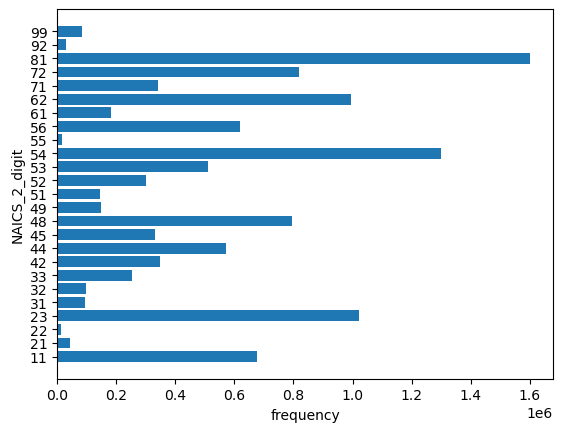

In [20]:
naics_freq = duckdb.sql('''
SELECT 
    LEFT(CAST(NAICSCode AS varchar),2) AS NAICS_2_digit
    , COUNT(*) AS frequency 
FROM 
    ppp 
WHERE NAICSCode IS NOT NULL
GROUP BY 
    NAICS_2_digit
ORDER BY 
    NAICS_2_digit
''').df()
plt.barh(naics_freq['NAICS_2_digit'], naics_freq['frequency'])
plt.ylabel('NAICS_2_digit')
plt.xlabel('frequency')
plt.show()

From a usability standpoint, this plot has much to be desired. Certainly, for those unfamiliar with all of the NAICS codes, it would be helpful to add better descriptions of each 2-digit code.

Depending on your goal in the display, you can also

In [22]:
duckdb.sql('''

SELECT 
    MIN(CurrentApprovalAmount) AS min
 ,  MEDIAN(CurrentApprovalAmount) AS median
 ,  AVG(CurrentApprovalAmount) AS avg
 ,  STDDEV(CurrentApprovalAmount) AS std
 ,  MAX(CurrentApprovalAmount) AS max
FROM 
    ppp 

''').df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,min,median,avg,std,max
0,0.0,20690.0,69112.581761,257655.153769,10000000.0


In [23]:
loan = duckdb.sql('SELECT CurrentApprovalAmount FROM ppp USING SAMPLE 100000').df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

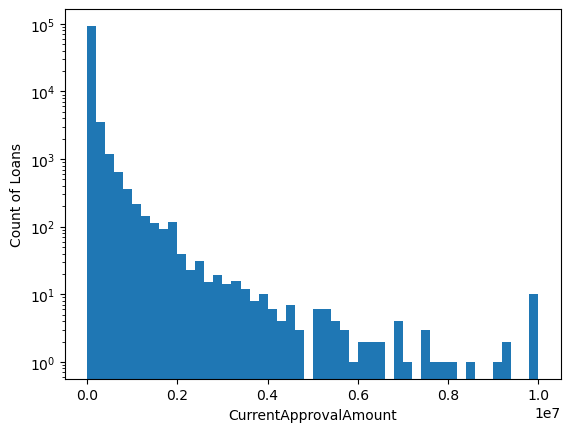

In [24]:
plt.hist(loan['CurrentApprovalAmount'], bins=50, log=True)
plt.xlabel('CurrentApprovalAmount')
plt.ylabel('Count of Loans')
plt.show()